In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('braznikova2_prep.csv', sep=';')
df.head(10)

,Y,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14
0,0,0,0,659,0,1092.0,13884.0,0,0,0,1
1,0,0,1,1518,1,348.0,11700.0,0,0,1,1
2,0,0,0,476,2,504.0,6786.0,0,0,1,1
3,0,0,0,1310,3,418.0,12948.0,0,0,1,1
4,0,1,2,2029,4,108.0,11427.0,0,0,0,0
5,0,1,3,3585,5,120.0,11856.0,0,1,0,0
6,1,0,4,4621,6,6.0,14508.0,0,0,0,0
7,1,0,5,8150,7,292.0,11310.0,0,0,0,0
8,0,0,0,1624,8,290.0,12324.0,0,0,0,0
9,0,1,6,3790,9,660.0,13455.0,0,0,0,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Y','X3','X5','X6','X7','X8','X9','X10','X12','X13','X14'])

In [4]:
df.head (10)

,Y,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14
0,0.0,0.0,0.000000,0.019868,0.000000,0.613483,0.901331,0.0,0.0,0.0,1.0
1,0.0,0.0,0.071429,0.113126,0.016667,0.195506,0.696683,0.0,0.0,1.0,1.0
2,0.0,0.0,0.000000,0.000000,0.033333,0.283146,0.236226,0.0,0.0,1.0,1.0
3,0.0,0.0,0.000000,0.090544,0.050000,0.234831,0.813624,0.0,0.0,1.0,1.0
4,0.0,0.5,0.142857,0.168603,0.066667,0.060674,0.671102,0.0,0.0,0.0,0.0
5,0.0,0.5,0.214286,0.337531,0.083333,0.067416,0.711301,0.0,1.0,0.0,0.0
6,1.0,0.0,0.285714,0.450005,0.100000,0.003371,0.959801,0.0,0.0,0.0,0.0
7,1.0,0.0,0.357143,0.833134,0.116667,0.164045,0.660139,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.124634,0.133333,0.162921,0.755154,0.0,0.0,0.0,0.0
9,0.0,0.5,0.428571,0.359787,0.150000,0.370787,0.861132,0.0,0.0,0.0,0.0


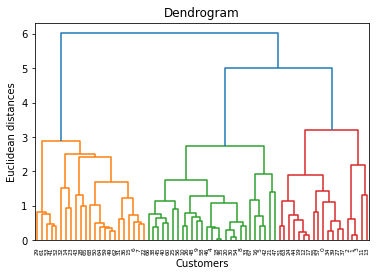

In [5]:
 #Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

По рисунку видно, что нужно выделить 3 кластера

In [6]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [7]:
hc

array([0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1,
       2, 2, 1], dtype=int64)

In [8]:
# Less features
X = df.iloc[:, [0, 1, 2, 3, 7, 10]] 

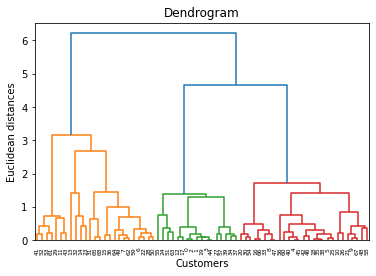

In [9]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc_znach = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [11]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc_znach1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [12]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust-hc.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [13]:
# Export hc clusters
import pickle
obj = {'hc_znach': hc_znach}
output = open('clust-hc_znach.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [14]:
# Export hc clusters
import pickle
obj = {'hc_znach1': hc_znach1}
output = open('clust-hc_znach1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()